# Sea Surface Height

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import xarray as xr
import pandas as pd
from glob import glob
import intake
import dask
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import cartopy
import cartopy.crs as ccrs

import nbscuid.util


## Reading in parameters

In [2]:
### this cell will get parametrized

path_to_cat = "placeholder"
subset_kwargs = {}
cluster_scheduler_address = None


### this is here so it can be run alone
#path_to_cat = "temp_data/ssh_cat_subset.json"

In [3]:
# Parameters
casename = "gcp-cases"
subset_kwargs = {"frequency": "month_1", "component": "ocn", "variable": "SSH"}
path_to_cat = "/glade/u/home/eromashkova/codes/nbscuid-examples/basic-demo/temp_data/gcp-cases_subset.json"


## Connecting to cluster

In [4]:
if cluster_scheduler_address is None:
    cluster, client = nbscuid.util.get_ClusterClient()
    cluster.scale(12)
else:
    client = Client(cluster_scheduler_address)
client

/glade/work/eromashkova/miniconda3/envs/diag-sandbox/lib/python3.9/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40674 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/eromashkova/proxy/40674/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/eromashkova/proxy/40674/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.12.206.48:35997,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/eromashkova/proxy/40674/status,Total threads: 0
Started: Just now,Total memory: 0 B


## Reading in data with subsetting

In [5]:
dset_dict = (intake.open_esm_datastore(path_to_cat).search(**subset_kwargs)).to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.stream.case'


## Plotting data

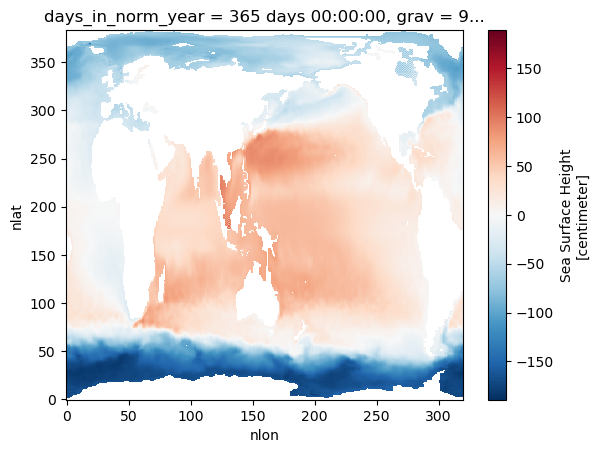

In [6]:
for i in dset_dict.keys():
    ds = dset_dict[i].isel(time=0)
    fig = plt.figure()
    ds.SSH.plot()